# Proyek Analisis Data: Bike sharing
- **Nama:** Aulia Muzhaffar
- **Email:** m322d4ky2577@bangkit.academy
- **ID Dicoding:** van_guetta

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penguna sepeda?
- Apakah pengaruh musim terhadap jumlah penguna sepeda ?
- Bagaimana  jumlah pengguna sepeda pada weekday, holiday  dan working day?

## Import Semua Packages/Library yang Digunakan

In [32]:
# Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pipreqs as pr
import streamlit as st
from datetime import datetime


## Data Wrangling

### Gathering Data

In [33]:
bike_day = pd.read_csv("data\day.csv")
bike_hour = pd.read_csv("data\hour.csv")

In [34]:
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [35]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### assesing tabel bike_day

In [36]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


berdasarkan info  diatas ada 1 tipe data yang tidak sesuai yaitu dteday dengan tipe data object, tipe ini akan diperbaiki dimana tipe datanya digantin dengan datetime. selainitu tipe data kategorikal nya juga tidak sesuai, pada data diatas tipe data katagorikal mengunakan numerikal, nanti akan saya ganti sesuai dengan tipe data katagorikal.

In [37]:
bike_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

berdasarkan data diatas tidak ada missing value pada tabel data bike_day

In [38]:
print("jumlah duplikasi data :", bike_day.duplicated().sum())

jumlah duplikasi data : 0


tidak ada data yang duplikat ini berarti datanya unik

In [39]:
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak ada keanehan dari deskripsi data statistik diatas

##### assesing tabel bike_hour

In [40]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


berdasarkan info  diatas ada 1 tipe data yang tidak sesuai yaitu dteday dengan tipe data object, tipe ini akan diperbaiki dimana tipe datanya digantin dengan datetime. selainitu tipe data kategorikal nya juga tidak sesuai, pada data diatas tipe data katagorikal mengunakan numerikal, nanti akan saya ganti sesuai dengan tipe data katagorikal.

In [41]:
bike_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value pada tabel bike_hour sehingga data unik

In [42]:
print("jumlah duplikasi data :", bike_hour.duplicated().sum())

jumlah duplikasi data : 0


tidak ada data yang terduplikat sehingga datanya bersih

### Cleaning Data

setelah melewati tahap data wraggling, saya dapat menyimpulkan data sudah bersih namun masih ada beberapa tipe data yang akan saya ubah karena tidak sesuai. saya juga akan mengganti nama kolom menjadi lebih sesuai dengan data. dan ada beberapa kolom yang akan saya hapus karena tidak terlalu penting untuk pertanyaan yang sudah saya siapkan.

saya akan menghapus tabel data bike_hour karena menurut saya tabel data bike_day sudah memadai untuk menjawab pertanyaan bisnis saya  dan kedua tabel data tersebut hanya berbeda di kolom hr saja

In [43]:
del bike_hour

menghapus kolom instant dan windspeed dari tabel karena 2 kolom ini tidak berpengaruh untuk menjawab pertanyaan bisnis saya

In [44]:
drop_columns = ['instant', 'windspeed']

for i in drop_columns:
    bike_day = bike_day.drop(i, axis=1)     # axis 1 = kolom, axis 0 = baris
    
    


mengecek kembali tabel bike_day untuk mengecek apakah kolom sudah terhapus atau belum

In [45]:
bike_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


memodifikasi nama kolom agar lebih sesuai, tidak disingkat dan mudah dipahami

In [46]:
bike_day = bike_day.rename(columns={
    'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 
    'weathersit': 'weather_cond', 'hum': 'humidity', 'cnt': 'count'})

bike_day.head()


,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,humidity,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


mengubah nilai value pada data kategorikal yang berupa angka menjadi lebih sesuai yaitu keterangan 

In [47]:
# Mapping numeric values to corresponding labels
bike_day['month'] = bike_day['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

bike_day['season'] = bike_day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

bike_day['weekday'] = bike_day['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

bike_day['weather_cond'] = bike_day['weather_cond'].map({1: 'Clear', 2: 'Misty/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Heavy Snow'})


Mengubah beberapa tipedata menjadi kategori dan mengubah tipe data kolom dateday menjadi datetime

In [48]:
# Mengubah tipe data ke datetime
bike_day['dateday'] = pd.to_datetime(bike_day.dateday)

# Mengubaha tipe data ke categorical
bike_day['season'] = bike_day.season.astype('category')
bike_day['year'] = bike_day.year.astype('category')
bike_day['month'] = bike_day.month.astype('category')
bike_day['holiday'] = bike_day.holiday.astype('category')
bike_day['weekday'] = bike_day.weekday.astype('category')
bike_day['workingday'] = bike_day.workingday.astype('category')
bike_day['weather_cond'] = bike_day.weather_cond.astype('category')

bike_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,humidity,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,82,1518,1600


In [49]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  humidity      731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


akhirnya tipe data yang tidak sesuai sudah diganti dengan tipe daya yang lebih cocok.

## Exploratory Data Analysis (EDA)

### Explore ...

1. pengelompokan penyewa sepeda(count) berdasarkan cuaca(weather_cond)

In [51]:
bike_day.groupby('weather_cond').agg({
    'count': ['min','mean', 'max', 'sum']
})

C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\3572932492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day.groupby('weather_cond').agg({


count                            
                  min         mean   max      sum
weather_cond                                     
Clear             431  4876.786177  8714  2257952
Light Snow/Rain    22  1803.285714  4639    37869
Misty/Cloudy      605  4035.862348  8362   996858

C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\3830441567.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




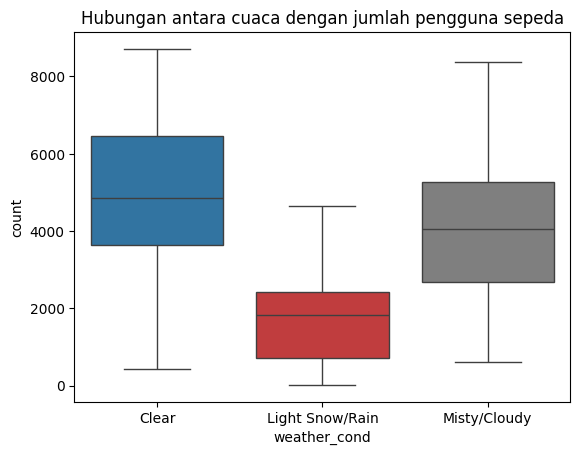

In [102]:
sns.boxplot(data=bike_day, x='weather_cond', y='count', palette=['tab:blue', 'tab:red', 'tab:gray'])
plt.title('Hubungan antara cuaca dengan jumlah pengguna sepeda')
plt.show()

Berdasakan visualisasi diatas dapat disimpulkan bahwa pengguna sepeda lebih sering mengunakan sepeda saat kondisi cuaca cerah , pada cuaca sedikit turun salju atau hujan jumlah pengguna sangat sedikit dibandingkan dengan cuaca cerah dan mendung. bahkan saat cuaca hujan lebat atau salju lebat tidak ada pengguna sepeda.

2. pengelompokan penyewa sepeda (count) berdasarkan musim(season)

In [52]:
bike_day.groupby('season').agg({
    'count': ['min','mean', 'max', 'sum']
})

C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\1030457007.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day.groupby('season').agg({


count                            
         min         mean   max      sum
season                                  
Fall    1115  5644.303191  8714  1061129
Spring   431  2604.132597  7836   471348
Summer   795  4992.331522  8362   918589
Winter    22  4728.162921  8555   841613

C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\2703045001.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




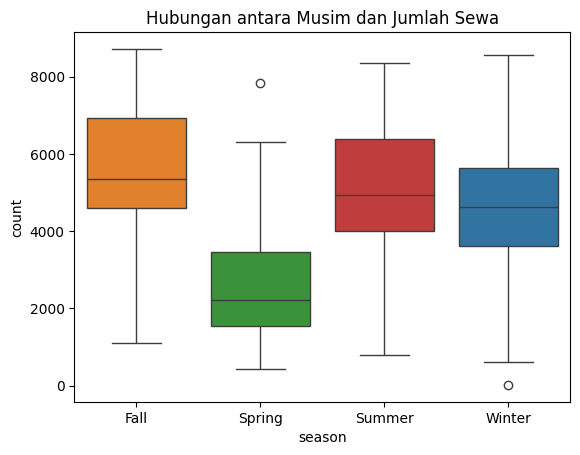

In [97]:
sns.boxplot(data=bike_day, x='season', y='count', palette={'Fall': 'tab:orange', 'Spring': 'tab:green', 'Summer': 'tab:red', 'Winter': 'tab:blue'})
plt.title('Hubungan antara Musim dan Jumlah Sewa')
plt.show()


Berdasarkan visualisasi diatas jumlah pengguna sepeda paling banyak saat musim gugur dan paling sedikit pada musim semi

3. pengelompokan penyewa sepeda berdasarkan hari kerja dan hari libur

In [53]:
bike_day.groupby('workingday').agg({
    'count': ['min','mean', 'max', 'sum']
})

C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\2273419878.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day.groupby('workingday').agg({


count                            
             min         mean   max      sum
workingday                                  
0            605  4330.168831  8714  1000269
1             22  4584.820000  8362  2292410

C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\1772231885.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




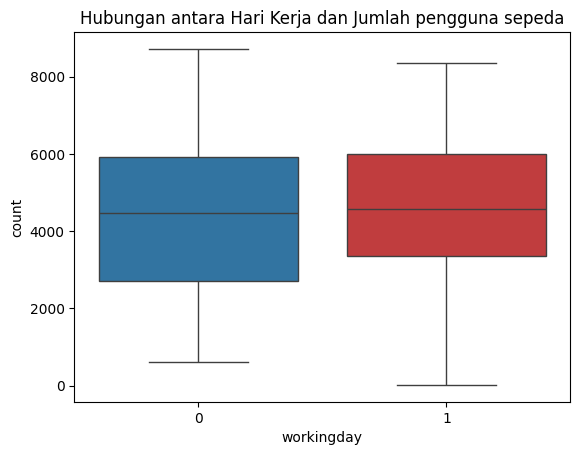

In [96]:
sns.boxplot(data=bike_day, x='workingday', y='count', palette={'0': 'tab:blue', '1': 'tab:red', '0': 'tab:blue', '1': 'tab:red'})
plt.title('Hubungan antara Hari Kerja dan Jumlah pengguna sepeda')
plt.show()

pada hari kerja ataupun bukan perbedaan pengguna sepeda tidak terlalu signifikan

In [54]:
bike_day.groupby('holiday').agg({ 
    'count': ['min','mean', 'max', 'sum']
})

C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\64274753.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day.groupby('holiday').agg({


count                            
          min         mean   max      sum
holiday                                  
0          22  4527.104225  8714  3214244
1        1000  3735.000000  7403    78435

C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\2599856005.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




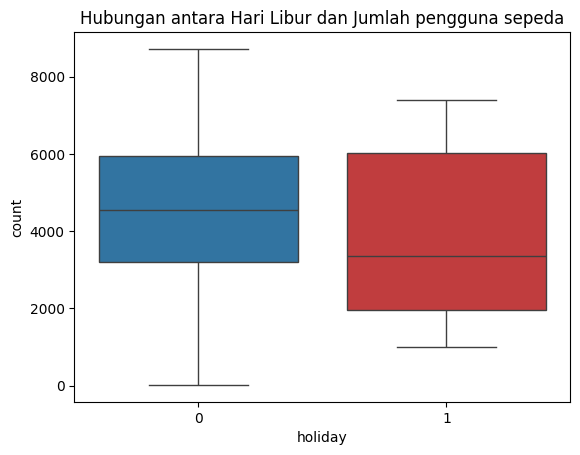

In [93]:
sns.boxplot(data=bike_day, x='holiday', y='count', palette={'0': 'tab:blue', '1': 'tab:red', '0': 'tab:blue', '1': 'tab:red'})
plt.title('Hubungan antara Hari Libur dan Jumlah pengguna sepeda')
plt.show()

sedangkan pada hari libur pengguna sepeda jauh lebih banyak secara rata rata dibanding rata rata bukan hari libur

4. korelasi suhu dengan jumlah pengguna sepeda


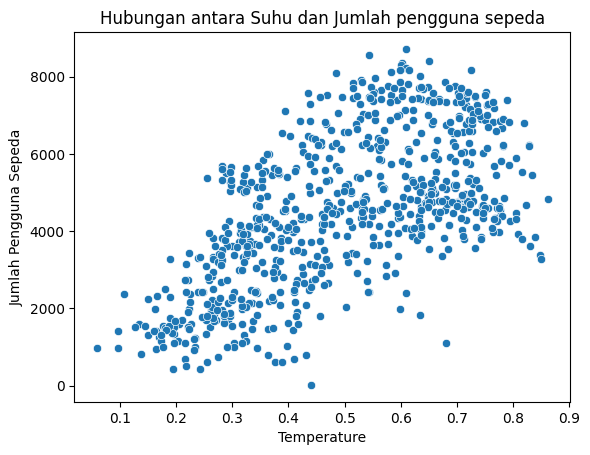

In [106]:
sns.scatterplot(data=bike_day, x='temp', y='count')
plt.title('Hubungan antara Suhu dan Jumlah pengguna sepeda')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan visualiasasi scatter plot dapat disimpulkan bahwa ada korelasi positif antara suhu dengan jumlah pengguna sepeda. dimana semakin naik suhu jumlah pengguna sepeda semakin banyak

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penguna sepeda?

C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\3661605949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


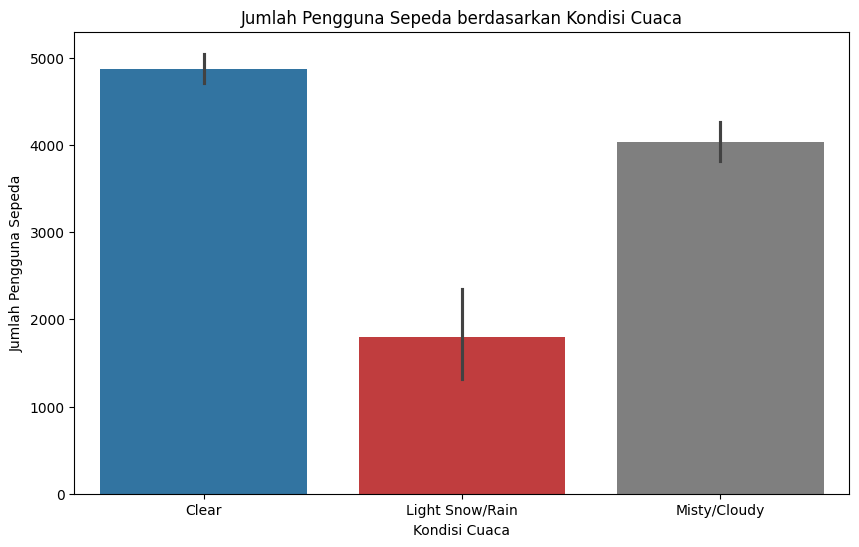

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=bike_day,
    palette={'Clear': 'tab:blue', 'Light Snow/Rain': 'tab:red', 'Misty/Cloudy': 'tab:gray'}
)
plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

berdasarkan barplot diatas disimpulkan bahwa pengguna sepeda paling berminat menggunakan sepeda pada cuaca yang bersih kemudian di peringkat 2 pada cuaca mendung sedangkan paling sedikit pada cuaca sedikit hujan / bersalju

### Pertanyaan 2: Apakah pengaruh musim terhadap jumlah penguna sepeda ?

C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\3064863657.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



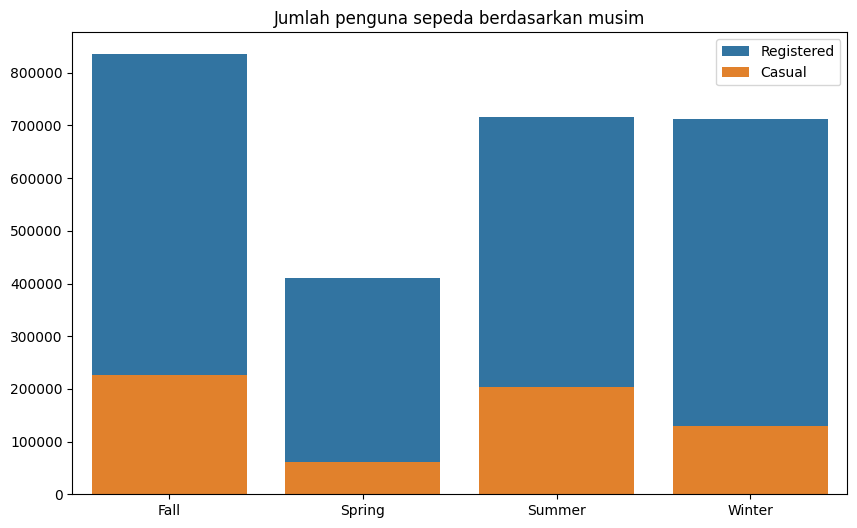

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
musim = bike_day.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat bar plot dengan seaborn
sns.barplot(x='season', y='registered', data=musim, color='tab:blue', label='Registered')
sns.barplot(x='season', y='casual', data=musim, color='tab:orange', label='Casual')

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penguna sepeda berdasarkan musim')
plt.legend()
plt.show()


berdasarkan hasil barplot diatas pada musim gugur pengguna sepeda baik casual maupun registered berada pada titik tertinggi, di ikuti oleh musim panas, musim dingin dan terakhir musim semi

### pertanyaan 3 : Bagaimana jumlah Pengguna sepeda berdasarkan working day, holiday dan weekday?

C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\872007809.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\872007809.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Asus\AppData\Local\Temp\ipykernel_23712\872007809.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




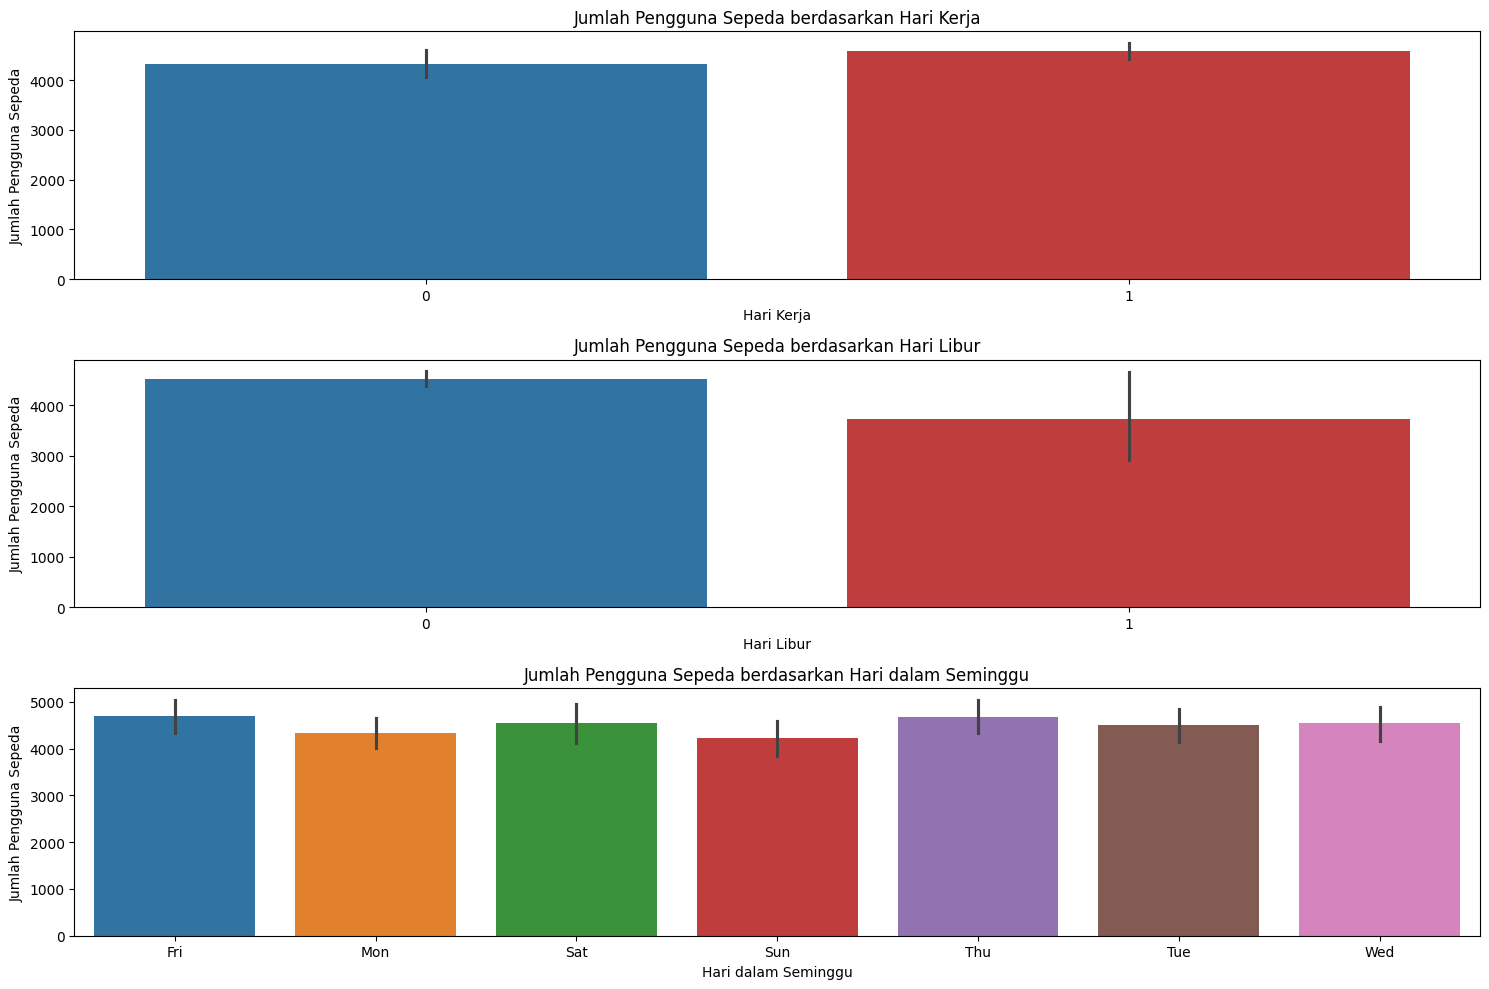

In [101]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(
        x='workingday',
        y='count',
        data=bike_day,
        ax=axes[0],
        palette=['tab:blue', 'tab:red']
)
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
    x='holiday',
    y='count',
    data=bike_day,
    ax=axes[1],
    palette=['tab:blue', 'tab:red']
)
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sns.barplot(
    x='weekday',
    y='count',
    data=bike_day,
    ax=axes[2],
    palette='tab10'
)
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan analisis visual menggunakan barplot, ditemukan beberapa temuan signifikan:

- Permintaan penyewaan sepeda lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan akhir pekan (Sabtu-Minggu). Angka 0 merepresentasikan akhir pekan, sedangkan 1 menunjukkan hari kerja.
- Permintaan penyewaan sepeda secara signifikan lebih tinggi pada hari reguler dibandingkan hari libur nasional.
- Hari Jumat mencatat jumlah penyewa sepeda tertinggi, sementara Minggu memiliki jumlah penyewa sepeda paling rendah.






In [105]:
bike_day.to_csv('cleaned_data_day.csv', index=False)


## Conclusion

- Conclution pertanyaan 1 : faktor cuaca memberikan pengaruh yang signifikan terhadapat tingkat penggunaan sepeda

- Conclution pertanyaan 2 :  bahwa aktivitas penggunaan sepeda cenderung meningkat selama musim gugur dan panas, sementara menurun pada musim dingin, dengan musim semi menjadi yang paling rendah. Kesimpulan ini dapat memberikan wawasan penting bagi penyedia layanan sepeda untuk mengoptimalkan penawaran mereka berdasarkan perubahan musim.


- conclution pertanyaan 3 :Pertama, terlihat bahwa permintaan penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan bahwa aktivitas bersepeda cenderung lebih tinggi selama hari kerja. Kedua, permintaan sepeda lebih tinggi pada hari-hari reguler daripada pada hari libur nasional, menunjukkan bahwa kebanyakan orang lebih memilih bersepeda saat hari-hari kerja reguler. Terakhir, analisis terhadap hari dalam seminggu menunjukkan bahwa Jumat adalah hari dengan jumlah penyewa sepeda tertinggi, sementara Minggu adalah yang terendah. Kesimpulan ini memberikan pemahaman yang penting bagi penyedia layanan sepeda untuk mengoptimalkan penawaran dan strategi pemasaran berdasarkan tren permintaan yang teramati pada hari-hari tertentu.